In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import gridspec
import matplotlib.colors as colors

In [2]:
# only shows multi-model means and ensemble range (min, max)
# similar to Darrell's figure
# BUT LGM anomaly is plotted as PI -LGM here

In [3]:
def load_data_mean(period,generation):
    f = pd.read_csv('csvfiles/%s_%s.csv'%(period,generation),header=0)
    dT = np.average(f['dT'])
    dTmax = np.max(f['dT'])
    dTmin = np.min(f['dT'])
    DATA = [dTmin,dT,dTmax]
    return DATA
        

In [4]:
# observations
# I need to check these numbers
obs_historical=[0.7,0.9,1.1]
obs_mh = [0.3,0.5,0.9]
obs_lgm=[5,6,7]# PI - LGM
obs_lig=[0.5,1,1.5]
obs_mpwp=[2.5,3.25,4]
obs_eeco=[10,14,18]

In [5]:
def plotting_1(generation,period,obs,color):
    data = load_data_mean(generation,period)
    plt.errorbar([obs[1]],[data[1]], yerr=[[data[1]-data[0]],[data[2]-data[1]]],xerr=[[obs[1]-obs[0]],[obs[2]-obs[1]]],marker='s',color=color,ms=8,label="%s %s"%(generation,period))

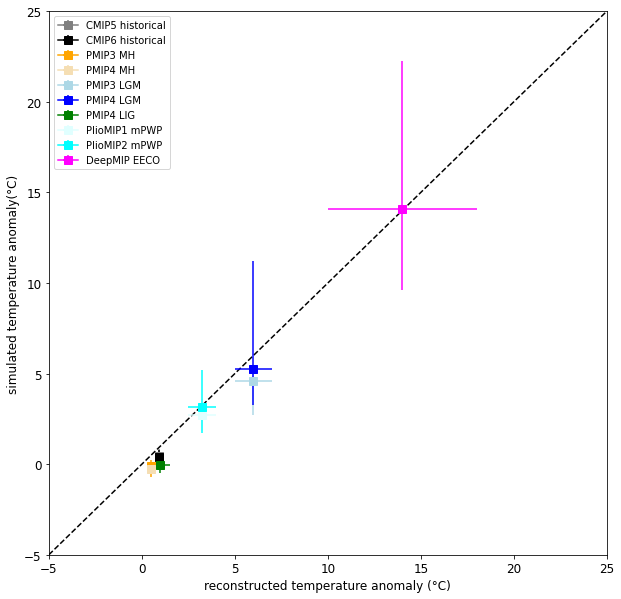

In [7]:
plt.figure(figsize=(10,10))
plt.xlim([-5,25])
plt.ylim([-5,25])
plt.plot([-5,25],[-5,25],'k--')
#historical
plotting_1('CMIP5','historical',obs_historical,'grey')
plotting_1('CMIP6','historical',obs_historical,'black')
#MH
plotting_1('PMIP3','MH',obs_mh,'orange')
plotting_1('PMIP4','MH',obs_mh,'wheat')
#LGM
plotting_1('PMIP3','LGM',obs_lgm,'lightblue')
plotting_1('PMIP4','LGM',obs_lgm,'blue')
#LIG
plotting_1('PMIP4','LIG',obs_lig,'green')
#mPWP
plotting_1('PlioMIP1','mPWP',obs_mpwp,'lightcyan')
plotting_1('PlioMIP2','mPWP',obs_mpwp,'cyan')
#EECO

plotting_1('DeepMIP','EECO',obs_eeco,'magenta')

plt.xlabel('reconstructed temperature anomaly (%sC)'%(chr(176)),fontsize=12)
plt.ylabel('simulated temperature anomaly(%sC)'%(chr(176)),fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.legend()